# Pointcloud-to-Graph Voronoi Lifting Tutorial

### Imports and utilities

In [7]:
# With this cell any imported module is reloaded before each cell execution
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import PointCloudLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_model_config,
    load_transform_config,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the Dataset

Here we just need to spicify the name of the available dataset that we want to load. First, the dataset config is read from the corresponding yaml file (located at `/configs/datasets/` directory), and then the data is loaded via the implemented `Loaders`.


In [8]:
dataset_name = "random_pointcloud"
dataset_config = load_dataset_config(dataset_name)
loader = PointCloudLoader(dataset_config)


Dataset configuration for random_pointcloud:

{'data_domain': 'pointcloud',
 'data_type': 'toy_dataset',
 'data_name': 'random_pointcloud',
 'data_dir': 'datasets/pointcloud/toy_dataset/random_pointcloud',
 'pos_to_x': True,
 'num_points': 20,
 'dim': 3}


We can then access to the data through the `load()`method:

In [9]:
dataset = loader.load()

Processing...
Done!


## Loading and Applying the Lifting

In this section we will instantiate the lifting we want to apply to the data. For this example the knn lifting was chosen. The algorithm takes the k nearest neighbors for each node and creates a hyperedge with them. The lifting is deterministic and creates a hypergraph with the same number of hyperedges as the number of nodes, and all the hyperedges have the same number of nodes in them. This lifting is based on the initial features of the nodes. The computational complexity of the algorithm is $O(nd+kn)$ [[1]](https://pubmed.ncbi.nlm.nih.gov/33211654/) where $n$ is the number of nodes in the graph, $d$ is the dimension of the feature space and $k$ is fixed.

***
[[1]](https://pubmed.ncbi.nlm.nih.gov/33211654/) Gao, Y., Zhang, Z., Lin, H., Zhao, X., Du, S., &amp; Zou, C. (2020). Hypergraph learning: Methods and
practices. IEEE Transactions on Pattern Analysis and Machine Intelligence, 44(5), 2548-2566.
***

For hypergraphs creating a lifting involves creating the `incidence_hyperedges` matrix.

Similarly to before, we can specify the transformation we want to apply through its type and id --the correxponding config files located at `/configs/transforms`. 

Note that the *tranform_config* dictionary generated below can contain a sequence of tranforms if it is needed.

This can also be used to explore liftings from one topological domain to another, for example using two liftings it is possible to achieve a sequence such as: graph -> simplicial complex -> hypergraph. 

In [10]:
# Define transformation type and id
transform_type = "liftings"
# If the transform is a topological lifting, it should include both the type of the lifting and the identifier
transform_id = "pointcloud2graph/voronoi_lifting"

# Read yaml file
transform_config = {
    "lifting": load_transform_config(transform_type, transform_id)
    # other transforms (e.g. data manipulations, feature liftings) can be added here
}


Transform configuration for pointcloud2graph/voronoi_lifting:

{'transform_type': 'lifting',
 'transform_name': 'VoronoiLifting',
 'support_ratio': 0.3,
 'feature_lifting': 'ProjectionSum'}


We than apply the transform via our `PreProcesor`:


Dataset only contains 1 sample:


Processing...
Done!


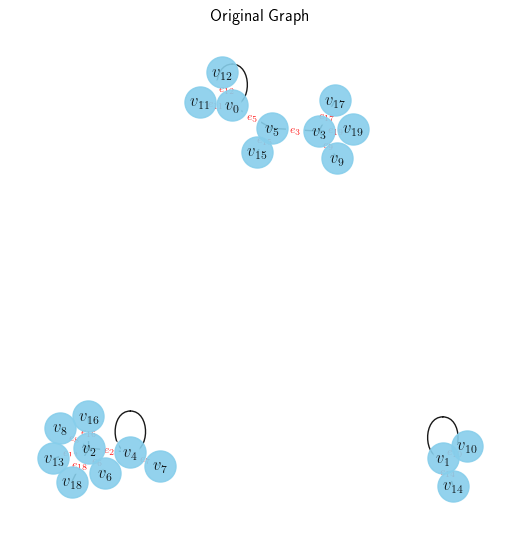

 - Set with 20 points.
 - Features dimension: 3



In [11]:
lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir)
describe_data(lifted_dataset)